In [503]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [504]:
X,y = make_classification(n_samples=200,random_state=41,n_classes=2,n_clusters_per_class=1,n_features=2,n_informative=1,n_redundant=0,hypercube=False,class_sep=20)

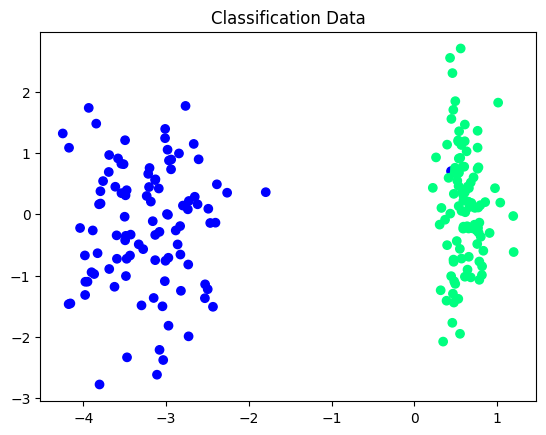

In [505]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.title("Classification Data")
plt.show()

In [506]:
def step(z):
    if z>0:
        return 1 
    else:
        return 0

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.1
    ephocs = 1000

    
    for i in range(ephocs):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + learning_rate*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

    

In [507]:
intercept_,coef_ = perceptron(X,y)

In [508]:
intercept_

np.float64(0.5000000000000001)

In [509]:
coef_

array([0.77919904, 0.10407328])

In [510]:
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])


In [511]:
m

np.float64(-7.487023289569613)

In [512]:
c

np.float64(-4.804307312899278)

In [513]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

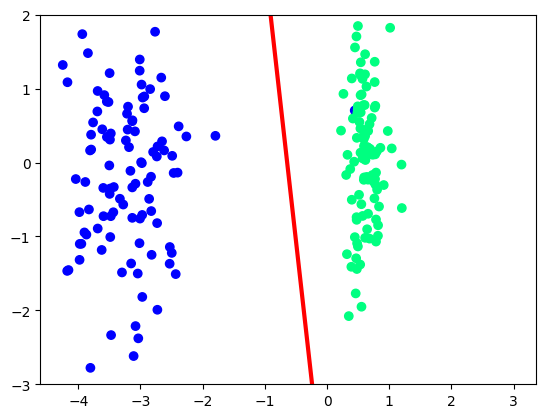

In [514]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

## NOW USING SIGMOID PERCEPTRON

In [515]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def perceptron_sigmoid(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr * (y[j]-y_hat) * X[j]
    
    return weights[0],weights[1:]

In [516]:
intercept_,coef_ = perceptron_sigmoid(X,y)

In [517]:
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])

In [518]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + c

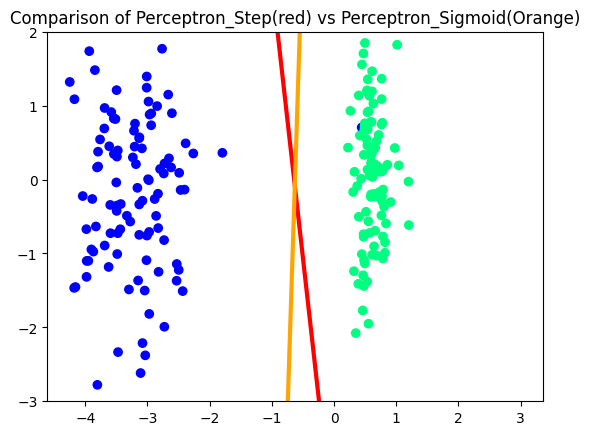

In [519]:
plt.plot(x_input, y_input, color ="red",linewidth = 3)
plt.plot(x_input1 ,y_input1 ,color ="orange",linewidth = 3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.title("Comparison of Perceptron_Step(red) vs Perceptron_Sigmoid(Orange)")
plt.ylim(-3,2)
plt.show()

In [520]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [527]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
c = -(lor.intercept_/lor.coef_[0][1])

In [522]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + c

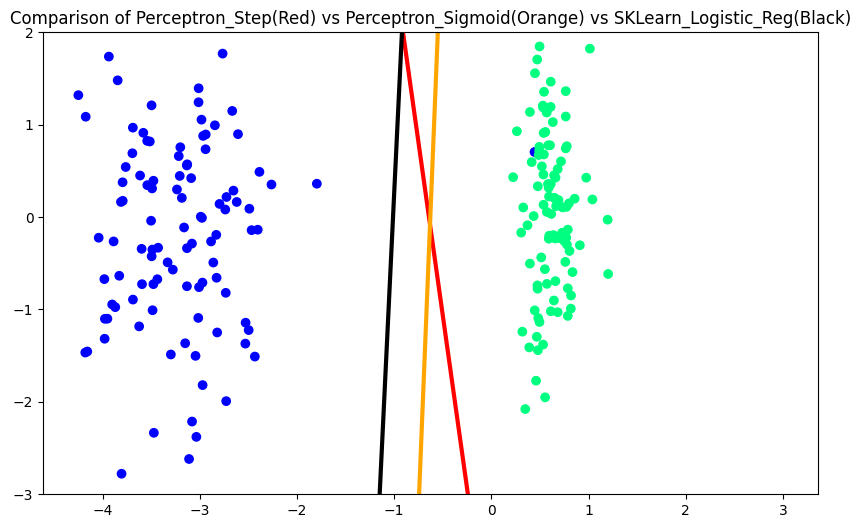

In [530]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color ="red",linewidth = 3)
plt.plot(x_input1 ,y_input1 ,color ="orange",linewidth = 3)
plt.plot(x_input2,y_input2,color = "black",linewidth = 3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)
plt.title("Comparison of Perceptron_Step(Red) vs Perceptron_Sigmoid(Orange) vs SKLearn_Logistic_Reg(Black)")
plt.show()